# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

# Import Statements

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

In [2]:
color_lego = pd.read_csv("./data/colors.csv")
color_lego.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [3]:
print(color_lego["name"].nunique(), "different lego colors")

135 different lego colors


In [4]:
color_lego.isna().sum()

id          0
name        0
rgb         0
is_trans    0
dtype: int64

Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>.

In [5]:
color_lego.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [6]:
color_lego["is_trans"].value_counts()

is_trans
f    107
t     28
Name: count, dtype: int64

### Understanding LEGO Themes vs. LEGO Sets



Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src="https://i.imgur.com/aKcwkSx.png">|

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src="https://i.imgur.com/whB1olq.png">

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.



In [7]:
sets_lego = pd.read_csv("./data/sets.csv")

In [8]:
sets_lego.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [9]:
sets_lego.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


In which year were the first LEGO sets released and what were these sets called?

In [10]:
sets_lego.year.min(), sets_lego.loc[sets_lego.year.idxmin()]["name"]

(1949, 'Extra-Large Gift Set (ABB)')

The first lego was released in the year 1949 with the name "Extra-Large Gift Set (ABB)"

How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [11]:
sets_lego[sets_lego["year"] == 1949].count()

set_num      5
name         5
year         5
theme_id     5
num_parts    5
dtype: int64

Find the top 5 LEGO sets with the most number of parts. 

In [12]:
df = sets_lego.sort_values(by="num_parts", ascending=False).iloc[:5]
df

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


 show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [13]:
sets_grouped_year = sets_lego.groupby("year").count()
sets_grouped_year.tail()

,set_num,name,theme_id,num_parts
year,,,,
2017,786,786,786,786
2018,816,816,816,816
2019,840,840,840,840
2020,674,674,674,674
2021,3,3,3,3


In [14]:
print(sets_grouped_year.loc[1955])
print(sets_grouped_year.loc[2019])

set_num      28
name         28
theme_id     28
num_parts    28
Name: 1955, dtype: int64
set_num      840
name         840
theme_id     840
num_parts    840
Name: 2019, dtype: int64


Show the number of LEGO releases on a line chart using Matplotlib.

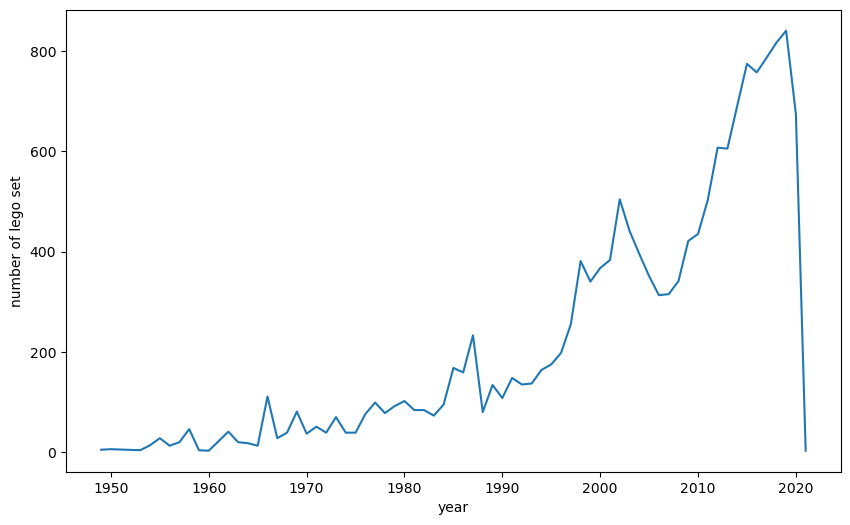

In [15]:
fig, ax = plt.subplots(figsize = (10,6))

ax.plot(sets_grouped_year.index, sets_grouped_year["set_num"])

ax.set(xlabel="year", ylabel="number of lego set")

plt.show()

- Since we have incompleted the last two years' data, it's better not to include this chart. That might draw the wrong meaning of the observation.

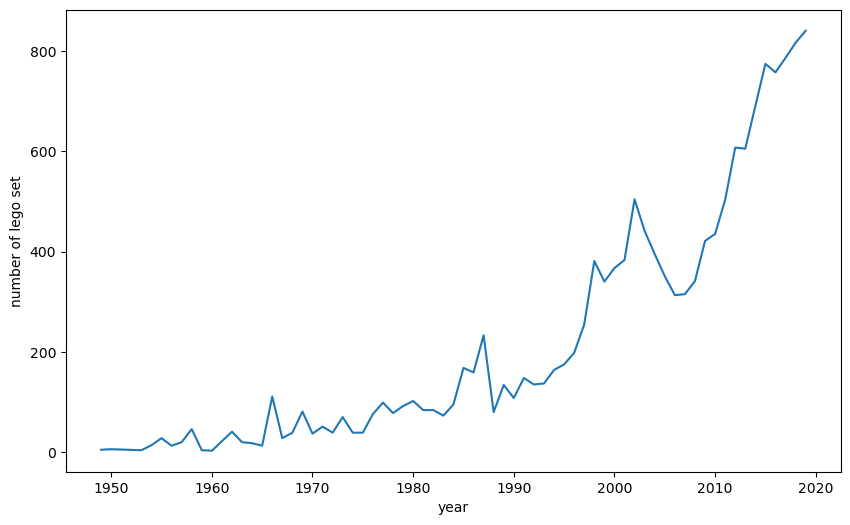

In [16]:
fig, ax = plt.subplots(figsize = (10,6))

ax.plot(sets_grouped_year.index[:-2], sets_grouped_year["set_num"][:-2])

ax.set(xlabel="year", ylabel="number of lego set")

plt.show()

### Aggregate Data with the Python .agg() Function

In [17]:
sets_lego.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [18]:
agg_sets_theme = sets_lego.groupby('year').agg({'theme_id': pd.Series.nunique})

In [19]:
agg_sets_theme.rename(columns={"theme_id": "nr_themes"}, inplace= True)
agg_sets_theme.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


- agg_sets_theme shows that in 1949, we had two different themes.
- to confirm it, let's get all the row of 1949 years 

In [20]:
[sets_lego[sets_lego["year"] == 1949]]

[      set_num                               name  year  theme_id  num_parts
 9521  700.1-1         Extra-Large Gift Set (ABB)  1949       365        142
 9534  700.2-1               Large Gift Set (ABB)  1949       365        178
 9539  700.3-1              Medium Gift Set (ABB)  1949       365        142
 9544  700.A-1              Small Brick Set (ABB)  1949       371         24
 9545  700.B-1  Small Doors and Windows Set (ABB)  1949       371         12]

- if we look at the theme_id we have 2 unique values

- agg_sets_theme gives the result of number of themes as in the column and per every year as in row.
- `sets_lego` groups it with the year and chains it with `agg()` by a number of unique value.

Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

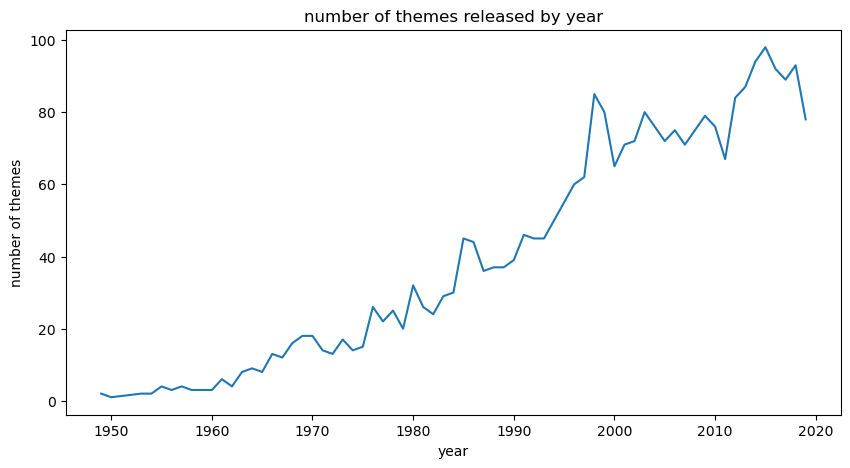

In [21]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(agg_sets_theme.index[:-2], agg_sets_theme["nr_themes"][:-2])

ax.set(title="number of themes released by year",
      xlabel="year",
      ylabel="number of themes")

plt.show()

- Lego was released in 1949 with two different themes
- Overall, It displays a constant increasing trend every decade with some ups and downs until 2000.
- In the years between 2000 and 2010, it breaks the constant rise in the number of themes to be still.
- In the last decade, The number of themes increased to a maximum of around 100 different themes.

### Line Charts with Two Seperate Axes

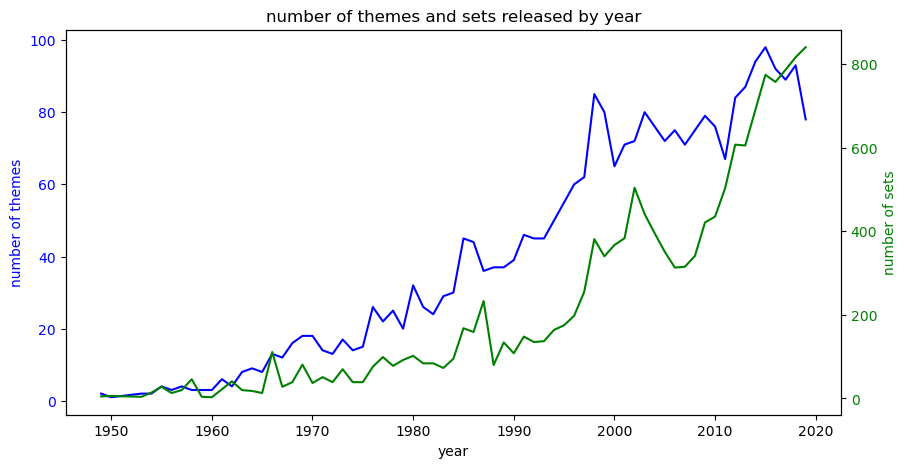

In [22]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(agg_sets_theme.index[:-2], agg_sets_theme["nr_themes"][:-2], c="blue")


ax.set(title="number of themes and sets released by year",
      xlabel="year")

ax.set_ylabel("number of themes", color="blue")

ax.tick_params(axis="y", labelcolor="blue")

ax1= ax.twinx()

ax1.plot(sets_grouped_year.index[:-2], sets_grouped_year["set_num"][:-2], c="green")

ax1.set_ylabel("number of sets", color="green")

ax1.tick_params(axis="y", labelcolor="green")

plt.show()

the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [23]:
avg_per_sets = sets_lego.groupby("year").agg({'num_parts': pd.Series.mean})

In [24]:
avg_per_sets.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


In [25]:
avg_per_sets.loc[1954],  avg_per_sets.loc[2017]

(num_parts    12.357143
 Name: 1954, dtype: float64,
 num_parts    221.840967
 Name: 2017, dtype: float64)

### Scatter Plots in Matplotlib

Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot.

- yes, the size and complexity of LEGO sets increased over time based on the number of parts.
- plotting the scatter graph, it shows the upward trend.

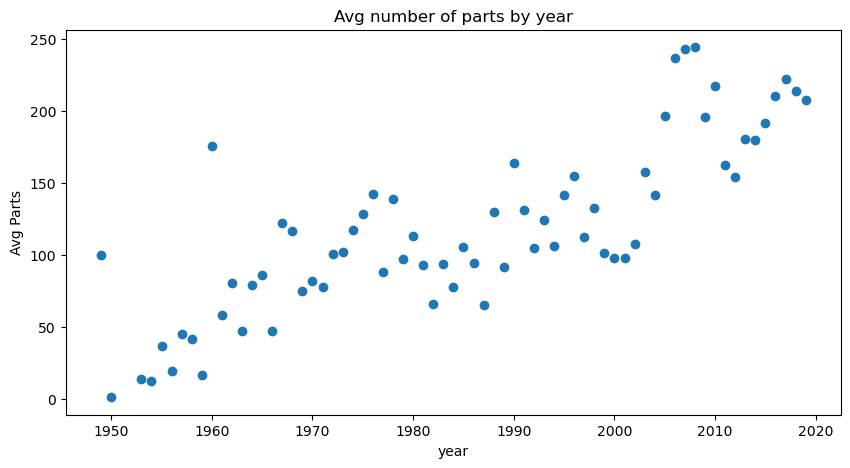

In [26]:
fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(avg_per_sets.index[:-2], avg_per_sets["num_parts"][:-2])

ax.set(title="Avg number of parts by year",
      xlabel="year",
      ylabel="Avg Parts")

plt.show()

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [27]:
sets_lego_theme = sets_lego["theme_id"].value_counts()

In [28]:
sets_lego[sets_lego["theme_id"] == 158].head()

,set_num,name,year,theme_id,num_parts
850,11912-1,Star Wars: Build Your Own Adventure,2016,158,73
855,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70
1717,20006-1,Clone Turbo Tank - Mini,2008,158,64
1728,20007-1,Republic Attack Cruiser - Mini,2009,158,84
1738,20009-1,AT-TE Walker - Mini,2009,158,94


- Star Wars hit the most Lego set build over the years.

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

<img src="https://i.imgur.com/Sg4lcjx.png" height=500px width=500px/>

Understanding the Structure and the table Schemas

In [29]:
themes_lego = pd.read_csv("./data/themes.csv")
themes_lego.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [30]:
x = themes_lego['name'].str.contains('Star')
x = x[x == True]
x.index

Index([17, 150, 174, 211, 275], dtype='int64')

In [31]:
themes_lego.iloc[x.index]

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0
275,345,Stars,324.0


- it has too many themes.. why?
- the reasons is Star Wars is a really long-running franchise. Theme number 18 was running from 2000 to 2002 and seems to be comprised of several of the show's characters.


### Merging (i.e., Combining) DataFrames based on a Key


In [32]:
sets_lego_theme_count = pd.DataFrame({'id' : sets_lego_theme.index,
                                     'set_counts': sets_lego_theme.values})
sets_lego_theme_count.head()

,id,set_counts
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [33]:
merge_themes = pd.merge(sets_lego_theme_count, themes_lego, on='id')
merge_themes.head()

,id,set_counts,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


In [34]:
merge_themes['id'].isna().count()

571

In [35]:
merge_themes.name[:10]

0            Star Wars
1                 Gear
2              Friends
3              Ninjago
4            Key Chain
5            Basic Set
6                Books
7                 Town
8         Supplemental
9    Duplo and Explore
Name: name, dtype: object

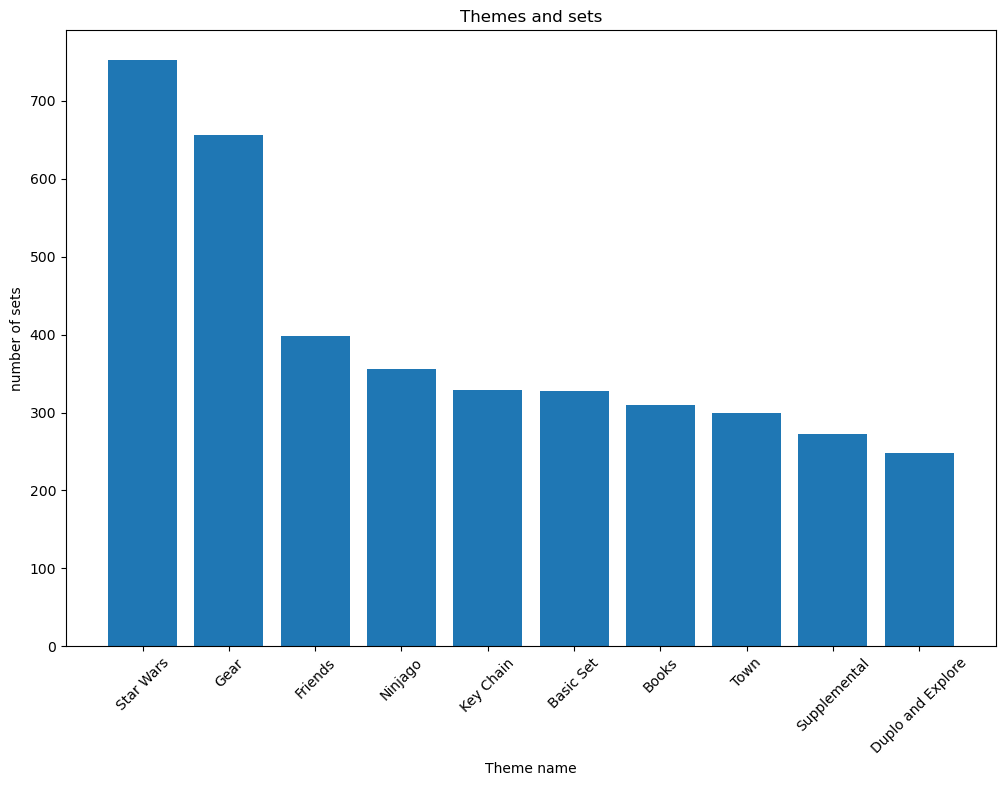

In [36]:
#lets visualise the top ten

fig, ax = plt.subplots(figsize=(12,8))

ax.bar(merge_themes["name"][:10], merge_themes["set_counts"][:10])

ax.set(title="Themes and sets",
      ylabel="number of sets",
      xlabel="Theme name" )

ax.tick_params(axis='x', rotation=45)

plt.show()

# Learning
* use HTML Markdown in Notebooks, such as section headings # and how to embed images with the `<img>` tag.

* combine the `groupby()` and `count()` functions to aggregate data

* use the `.value_counts()` function

* use the `.agg()` function to run an operation on a particular column

* `rename()` columns of DataFrames

* create a line chart with two separate axes to visualise data that have different scales.

* create a scatter plot in Matplotlib

* work with tables in a relational database by using primary and foreign keys

* `.merge()` DataFrames along a particular column

* create a bar chart with Matplotlib